<a href="https://colab.research.google.com/github/amitabh16kgpian/Machine-Learning-Projects/blob/main/Face_Mask_Detection_using_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install kaggle                        #installing the kaggle library in python

import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Colab Notebooks/Kaggle"
%cd "/content/drive/MyDrive/Colab Notebooks/Kaggle"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/drive/MyDrive/Colab Notebooks/Kaggle


In [36]:
#configuring the path of Kaggle.json file
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [39]:
#API to fetch the dataset from Kaggle           (copy API command)
!kaggle datasets download -d omkargurav/face-mask-dataset


face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
# from zipfile import ZipFile
# dataset = '/content/drive/MyDrive/Colab Notebooks/Kaggle/face-mask-dataset.zip'

# with ZipFile(dataset,'r') as zip:               #first reading the zipfile and then extracting it
#   zip.extractall()
#   print('The dataset is extracted')

In [41]:
!ls

data  face-mask-dataset.zip  kaggle.json


**Importing the dependencies i.e the required libraries**

In [42]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os                                       #to access files in the folder
import cv2
from google.colab.patches import cv2_imshow    #to open image in another window
from PIL import Image                           #to display the image
from sklearn.model_selection import train_test_split

Giving name to all the image file

In [71]:
with_mask_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Kaggle/data/with_mask')           #this step creates a list of name of all images in file with_mask
without_mask_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Kaggle/data/without_mask')

In [72]:
print(with_mask_files[0:10])
print(without_mask_files[0:10])

['with_mask_3451.jpg', 'with_mask_3452.jpg', 'with_mask_3453.jpg', 'with_mask_3454.jpg', 'with_mask_3455.jpg', 'with_mask_3456.jpg', 'with_mask_3457.jpg', 'with_mask_3458.jpg', 'with_mask_346.jpg', 'with_mask_3459.jpg']
['without_mask_2325.jpg', 'without_mask_2326.jpg', 'without_mask_2327.jpg', 'without_mask_2328.jpg', 'without_mask_233.jpg', 'without_mask_2329.jpg', 'without_mask_2331.jpg', 'without_mask_2330.jpg', 'without_mask_2334.jpg', 'without_mask_2332.jpg']


In [73]:
print('Number of with mask images:',len(with_mask_files))
print('Number of with withmask images:',len(without_mask_files))

Number of with mask images: 3725
Number of with withmask images: 3828


Creating lebels for the two class of images

In [74]:
# with mask--> 1
# without mask --> 0

In [75]:
#create the lebels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [76]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [77]:
lebels = with_mask_labels + without_mask_labels
print(lebels)
print(len(lebels))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Displaying the Images 

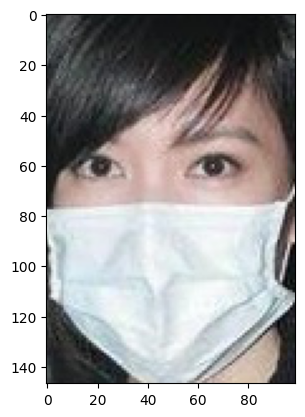

In [78]:
#with face mask images
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Kaggle/data/with_mask/with_mask_5.jpg')        #reading image as a numpy array
imgplot = plt.imshow(img)                           #plt.imshow() is used to display data as an image
plt.show()

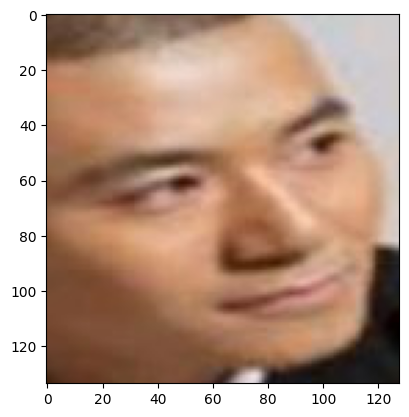

In [79]:
#without face mask images
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/Kaggle/data/without_mask/without_mask_7.jpg')        #reading image as a numpy array
imgplot = plt.imshow(img)       #plt.imshow() is used to display data as an image
plt.show()


**Image Processing**

1.Convert images to numpy arrays         
2.Resize the images

In [80]:
#converting with mask images to numpy arrays

with_mask_path ='/content/drive/MyDrive/Colab Notebooks/Kaggle/data/with_mask/'

data =[]
for img_file in with_mask_files :
  image = Image.open(with_mask_path + img_file)
    #every time name of the image file will be allocated img_file and complete path of each image will be formed
  image = image.resize((128,128))                    #Image module helps in image editing
  image = image.convert('RGB')
  image = np.array(image)                            #conveting images into numpy arrays
  data.append(image)
len(data)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3725

In [81]:
# #converting without mask images to numpy arrays

without_mask_path ='/content/drive/MyDrive/Colab Notebooks/Kaggle/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)     
    #every time name of the image file will be allocated img_file and complete path of each image will be formed
  image = image.resize((128,128))                                                    #Image module helps in image editing
  image = image.convert('RGB')
  image = np.array(image)                            #conveting images into numpy arrays
  data.append(image)
len(data)

7553

In [82]:
print(data[0])

[[[115 110 106]
  [110 105 100]
  [115 109 106]
  ...
  [165 146 135]
  [166 152 142]
  [168 161 156]]

 [[111 106 101]
  [115 110 105]
  [114 109 105]
  ...
  [172 161 154]
  [165 149 140]
  [162 147 138]]

 [[110 105 101]
  [113 108 104]
  [119 114 109]
  ...
  [166 143 132]
  [163 139 128]
  [163 144 134]]

 ...

 [[175 165 147]
  [120  90  51]
  [117  86  41]
  ...
  [  9   8  13]
  [  9   9   8]
  [  9   9  10]]

 [[138 116  84]
  [114  83  40]
  [118  87  43]
  ...
  [  7   7  11]
  [  9   8   9]
  [ 10  10  12]]

 [[112  80  39]
  [116  85  41]
  [120  89  42]
  ...
  [  6   6   9]
  [  8   8  12]
  [ 10   9  13]]]


In [84]:
print(data[0].shape)                 #gives height,width,color channel

(128, 128, 3)


Till now most of the preprocessing is done only general ones are left


Converting image list and lebel list

In [85]:
X = np.array(data)
Y = np.array(lebels)

In [86]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Doing train-test split

In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [88]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [89]:
print(X_train[0])
print(X_train_scaled[0])

[[[153 165  86]
  [123 133  57]
  [101 108  37]
  ...
  [ 72  96  34]
  [ 74 102  44]
  [ 64  90  35]]

 [[142 155  74]
  [122 133  55]
  [116 123  52]
  ...
  [ 74  97  35]
  [ 71  98  39]
  [ 68  93  37]]

 [[139 153  67]
  [123 134  54]
  [123 130  57]
  ...
  [ 87 109  46]
  [ 76 101  42]
  [ 73  96  40]]

 ...

 [[ 77  81  18]
  [ 89  95  30]
  [ 88  95  27]
  ...
  [  6  63 134]
  [  0  81 151]
  [  3  92 168]]

 [[106 109  49]
  [ 99 103  41]
  [ 93 100  35]
  ...
  [  2  61 132]
  [  0  84 154]
  [  3  93 170]]

 [[123 127  68]
  [104 108  47]
  [ 92  98  35]
  ...
  [  2  60 131]
  [  1  86 158]
  [  5  95 174]]]
[[[0.6        0.64705882 0.3372549 ]
  [0.48235294 0.52156863 0.22352941]
  [0.39607843 0.42352941 0.14509804]
  ...
  [0.28235294 0.37647059 0.13333333]
  [0.29019608 0.4        0.17254902]
  [0.25098039 0.35294118 0.1372549 ]]

 [[0.55686275 0.60784314 0.29019608]
  [0.47843137 0.52156863 0.21568627]
  [0.45490196 0.48235294 0.20392157]
  ...
  [0.29019608 0.3803921

Building Convolutional Neural Network **(CNN)**

In [91]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D, Flatten,Dropout

In [92]:
number_of_classes = 2
model = Sequential([Conv2D(32,kernel_size = (3,3) ,activation ='relu',input_shape= (128,128,3)),
                    MaxPooling2D(pool_size=(2,2)),


                    Conv2D(64,kernel_size = (3,3) ,activation ='relu'),
                    MaxPooling2D(pool_size=(2,2)),

                    Flatten(),               #to convet matrix into vector

                    Dense(128, activation = 'relu'),
                    Dropout(.5),              #just to prevent overfitting

                    Dense(64, activation = 'relu'),
                    Dropout(.5),    

                    Dense(number_of_classes,activation='sigmoid')  

                           ])

In [93]:
#compile the neural network
model.compile(optimizer ='adam',loss= 'sparse_categorical_crossentropy', metrics=['acc'])


In [94]:
#trainig our neural network
history = model.fit(X_train_scaled,Y_train,validation_split =.1,epochs = 5)       #here at epoch 10% of the data will be left for validation 

Epoch 1/5
170/170 [==============================] - 16s 25ms/step - loss: 0.4537 - acc: 0.8196 - val_loss: 0.2632 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2900 - acc: 0.8869 - val_loss: 0.2194 - val_acc: 0.8992
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2254 - acc: 0.9101 - val_loss: 0.2355 - val_acc: 0.8942
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1886 - acc: 0.9215 - val_loss: 0.1959 - val_acc: 0.9223
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1658 - acc: 0.9373 - val_loss: 0.2153 - val_acc: 0.9157


**Model Evaluation**

In [95]:
loss , accuracy = model.evaluate(X_test_scaled,Y_test)

48/48 [==============================] - 0s 9ms/step - loss: 0.2636 - acc: 0.9047


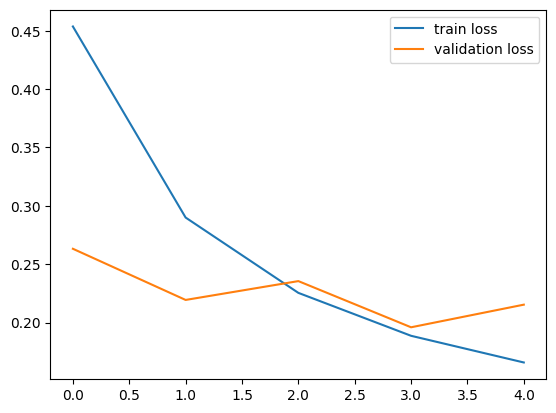

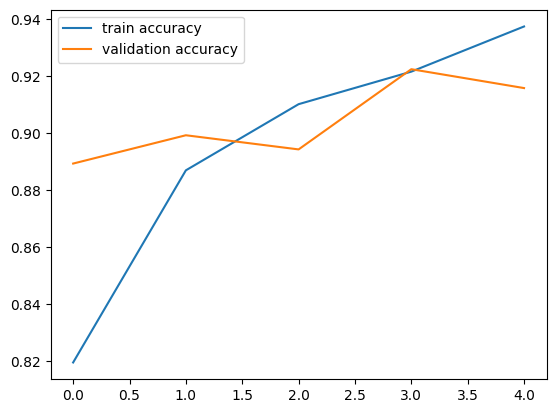

In [96]:
h = history
#plot loss value
plt.plot(h.history['loss'],label ='train loss')
plt.plot(h.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

#plot accuracy value
plt.plot(h.history['acc'],label ='train accuracy')
plt.plot(h.history['val_acc'],label = 'validation accuracy')
plt.legend()
plt.show()

**Predictive System**

enter the image path which is to be tested/content/new_test.jpg


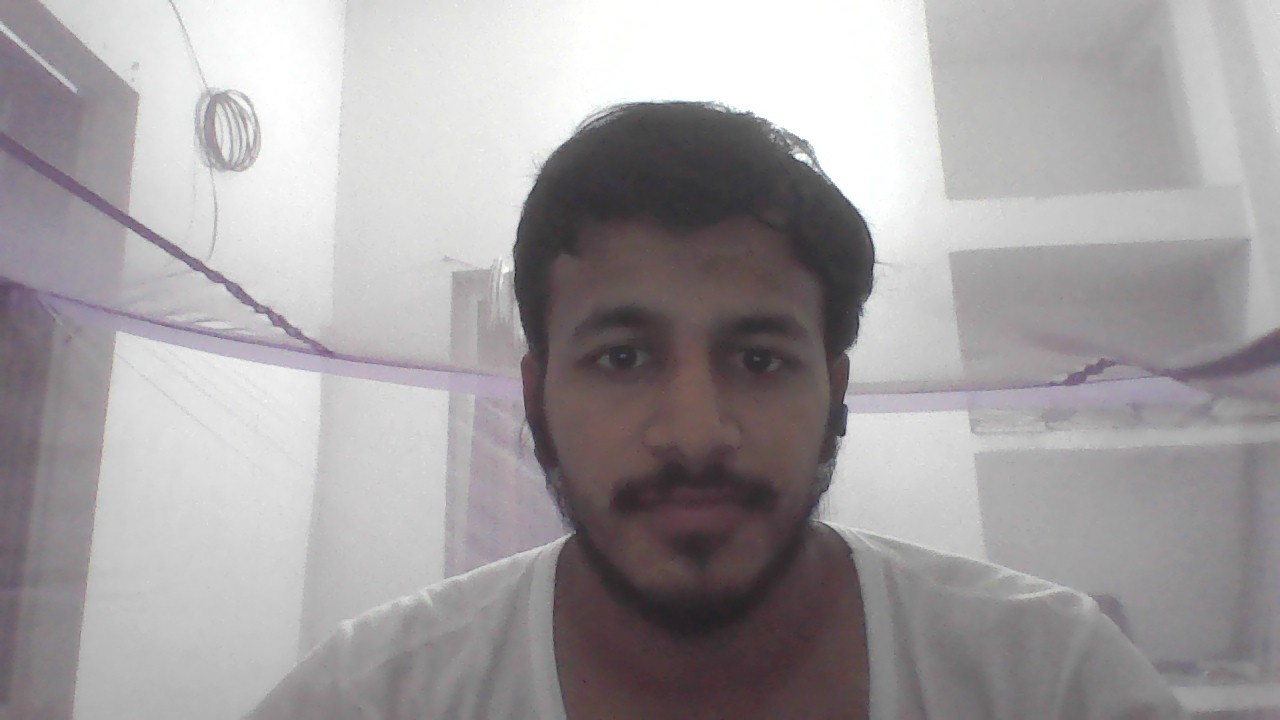

1/1 [==============================] - 0s 26ms/step
0
The person in the image is not wearing a mask


In [105]:
input_image_path =input('enter the image path which is to be tested')

input_image = cv2.imread(input_image_path)             #reading input image as a numpy array

cv2_imshow(input_image)


input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])      #to give command that only one image is given to check
input_prediction = model.predict(input_image_reshaped)


input_pred_lebel = np.argmax(input_prediction)
print(input_pred_lebel)

if input_pred_lebel == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')
